# Подготовка данных

In [1]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')

In [3]:
df = df.dropna(subset=['sex'])
df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,major_required_trans_f5,tlr_f5,tvr_f5
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [5]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'race', 'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

invention_cols = ['single_vessel', 'trifurcation', 'several_biffurcations', 'bifurcation_location', 
                  'lesion_ivolves', 'protected_left_main', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'overlap_sb', 'cto_bifurc', 
                  'syntax_score', 'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 'trombus_aspiration', 
                  'kissing_predilitation', 'stenting', 'drug_coated_balloon', 'balloon_angioplasty', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

In [6]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [7]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [8]:
df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,major_required_trans_f5,tlr_f5,tvr_f5
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
patient_present_cols = patient_info_cols + invention_cols + operation_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [10]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,sb_stent_sb_diametr,twostent_technique,sb_dilatation,stent_postdilatation,proximal_optimization,pot,pot_balloon_diametr,kissing_post,modified_kis,several_kissing
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,0.952381,7.0,0.0,1.0,0.0,NaN,NaN,1.0,0.0,0.0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,1.333333,NaN,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,1.153846,NaN,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,1.285714,NaN,0.0,0.0,1.0,1.0,5.0,0.0,0.0,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,1.590909,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,1.500000,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,1.100000,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,1.000000,7.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,0.750000,NaN,0.0,0.0,1.0,1.0,4.0,0.0,0.0,NaN


In [11]:
def remove_columns_with_nan_threshold(df, threshold=250):
    """
    Удаление колонок из DataFrame с количеством NaN больше заданного порога.

    Параметры:
    df : pandas.DataFrame
        Исходный DataFrame, из которого будут удалены колонки.
    threshold : int
        Пороговое значение количества NaN для удаления колонки.

    Возвращает:
    pandas.DataFrame
        DataFrame после удаления колонок.
    """
    # Считаем количество NaN в каждой колонке
    nan_counts = df.isnull().sum()

    # Получаем список колонок, которые нужно удалить
    columns_to_drop = nan_counts[nan_counts > threshold].index

    # Удаляем колонки
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

In [12]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

In [13]:
patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,77.0,1.0,84.0,165.0,1.0,5.0,0.0,1.0,0.0,...,0,0,0,0,1.111111,0.952381,0.0,1.0,1.0,0.0
1,1.0,68.0,0.0,81.0,171.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.290323,1.333333,0.0,0.0,1.0,0.0
2,1.0,62.0,0.0,74.0,180.0,1.0,4.0,0.0,1.0,1.0,...,0,0,0,0,1.000000,1.153846,0.0,1.0,0.0,0.0
3,1.0,67.0,1.0,84.0,167.0,1.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0.957447,1.285714,0.0,0.0,0.0,0.0
4,1.0,57.0,0.0,103.0,174.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.250000,1.590909,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1.0,67.0,1.0,90.0,174.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.200000,1.500000,1.0,1.0,1.0,1.0
2054,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,1.0,0.0,...,0,0,1,0,1.100000,1.100000,0.0,0.0,0.0,0.0
2055,2.0,81.0,0.0,50.0,160.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.000000,1.000000,1.0,1.0,1.0,1.0
2056,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,1.0,0.0,...,0,0,0,0,1.090909,0.750000,0.0,0.0,0.0,0.0


In [14]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [15]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,77.0,1.0,84.0,165.0,1.0,5.0,0.0,1.0,0.0,...,0,0,0,0,1.111111,0.952381,0.0,1.0,1.0,0.0
1,1.0,68.0,0.0,81.0,171.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.290323,1.333333,0.0,0.0,1.0,0.0
2,1.0,62.0,0.0,74.0,180.0,1.0,4.0,0.0,1.0,1.0,...,0,0,0,0,1.0,1.153846,0.0,1.0,0.0,0.0
3,1.0,67.0,1.0,84.0,167.0,1.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0.957447,1.285714,0.0,0.0,0.0,0.0
4,1.0,57.0,0.0,103.0,174.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.25,1.590909,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1.0,67.0,1.0,90.0,174.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.2,1.5,1.0,1.0,1.0,1.0
2054,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,1.0,0.0,...,0,0,1,0,1.1,1.1,0.0,0.0,0.0,0.0
2055,2.0,81.0,0.0,50.0,160.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0
2056,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,1.0,0.0,...,0,0,0,0,1.090909,0.75,0.0,0.0,0.0,0.0


In [16]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 'proximal_diametr', 'distal_diametr', 'side_diametr',
            'stenosis_proximal', 'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 'stent_diameter', 'stent_length',
            'stent_distal_vessel_size', 'sb_stent_sb_diametr']
cathegorical = ['sex', 'race', 'clinical_presentation', 'bifurcation_location', 'stent_number', 'stent_number_bif', 'stent_technique',
               'stent_direction', ]
binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1',
         'if_yes_what_type___2', 'if_yes_what_type___3', 'if_yes_what_type___4',  'if_yes_what_type___6', 
          'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 'history_of_cancer',
         'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation', 'several_biffurcations', 'calcium', 'trombosis', 'restenosis_reocclusion',
         'cto_bifurc', 'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm', 'def', 'def_2', 'side_protection', 'main_predilatation',
         'side_predilat', 'kissing_predilitation', 'stenting', 'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 'sb_dilatation', 'stent_postdilatation',
         'kissing_post', 'modified_kis']

In [17]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

146
1961


In [18]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [20]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[cathegorical + binary] = imputer_categorical.fit_transform(X_train[cathegorical + binary])
X_test[cathegorical + binary] = imputer_categorical.transform(X_test[cathegorical + binary])
X_val[cathegorical + binary] = imputer_categorical.transform(X_val[cathegorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,68.0,0.0,76.000000,154.000000,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.857143,1.034483,0.0,1.0,0.0,0.0
1,1.0,67.0,0.0,80.000000,167.000000,1.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,1.086957,0.0,0.0,0.0,0.0
2,1.0,52.0,1.0,100.000000,170.000000,1.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.937500,0.731707,0.0,0.0,0.0,0.0
3,1.0,75.0,0.0,87.000000,179.000000,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.071429,1.304348,0.0,1.0,0.0,0.0
4,2.0,65.0,1.0,86.614613,159.897683,1.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.757576,0.833333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1.0,57.0,0.0,90.000000,167.000000,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.290323,1.142857,0.0,0.0,1.0,0.0
1172,1.0,59.0,1.0,75.000000,168.000000,1.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.206897,1.346154,0.0,0.0,0.0,0.0
1173,1.0,69.0,0.0,66.000000,170.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.166667,1.206897,0.0,0.0,1.0,1.0
1174,1.0,57.0,0.0,93.000000,185.000000,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.290323,1.333333,0.0,0.0,1.0,0.0


/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


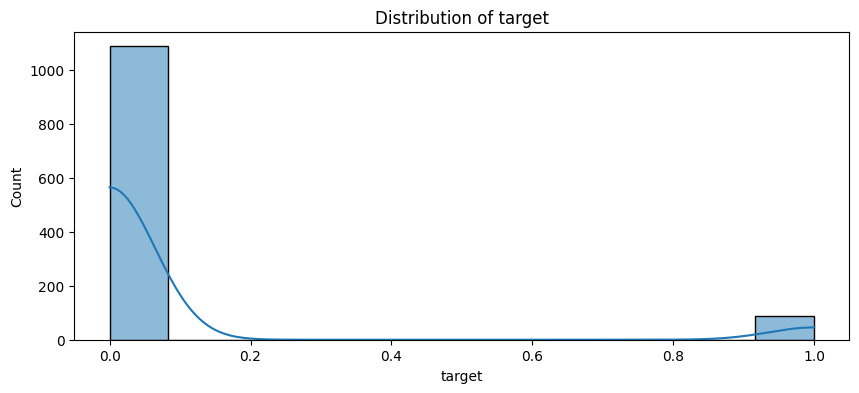

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(y_train, kde=True)
plt.title(f'Distribution of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

In [23]:
X_train_with_ID = X_train.copy()


In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[cathegorical], X_test[cathegorical], X_val[cathegorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [25]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [26]:
X_train = process_ohe(X_train, cathegorical, ohe)
X_test = process_ohe(X_test, cathegorical, ohe)
X_val = process_ohe(X_val, cathegorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_number_bif_3.0,stent_number_bif_4.0,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0
0,68.0,0.0,76.000000,154.000000,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,67.0,0.0,80.000000,167.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,100.000000,170.000000,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75.0,0.0,87.000000,179.000000,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,65.0,1.0,86.614613,159.897683,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,57.0,0.0,90.000000,167.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1172,59.0,1.0,75.000000,168.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1173,69.0,0.0,66.000000,170.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1174,57.0,0.0,93.000000,185.000000,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

In [28]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,creatinine,stent_type___5,...,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,medina_side,side_stenosis,distal_diametr,side_diametr
0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,80.000000,3.5,2.9
1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,97.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,2.5,2.3
2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,109.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,3.2,4.1
3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,168.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,2.8,2.3
4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,105.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,95.000000,3.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,106.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,3.1,3.5
1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,97.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.553568,2.9,2.6
1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,70.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,40.000000,3.0,2.9
1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,107.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,3.1,3.0


In [29]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['creatinine',
 'minor_criteria',
 'medina_side',
 'side_stenosis',
 'side_diametr']

In [30]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,if_yes_what_type___1,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5
1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5
2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2
3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8
4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1
1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9
1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1


In [31]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1176, 25)
(392, 25)
(393, 25)


In [32]:
print(X_train.columns)

Index(['anemia', 'cerebrovascular_disease', 'ef', 'age',
       'peripheral_artery_disease', 'single_vessel', 'ckd', 'copd',
       'stent_type___5', 'if_yes_what_type___1', 'atrial_fibrilation',
       'calcium', 'mi_history', 'adhoc_pci', 'stent_length',
       'clinical_presentation_2.0', 'def', 'sb_dilatation',
       'bifurcation_location_2.0', 'trifurcation', 'stent_number_1.0',
       'main_predilatation', 'stent_type___3', 'side_predilat',
       'distal_diametr'],
      dtype='object')


# Syntentic data

In [33]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
0,0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5
1,1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5
2,2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2
3,3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8
4,4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1
1172,1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9
1173,1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
1174,1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1


In [34]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr,target
0,0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0
1,1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5,0
2,2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2,0
3,3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8,1
4,4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,0
1172,1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9,1
1173,1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
1174,1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1,0


In [35]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

In [36]:
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

# synthesizer = GaussianCopulaSynthesizer(metadata, default_distribution='norm')
synthesizer = CTGANSynthesizer(metadata, epochs=500)
# synthesizer = TVAESynthesizer(metadata, epochs=500)
# synthesizer = CopulaGANSynthesizer(metadata, epochs=500, default_distribution='norm')
synthesizer.fit(X_train_with_ID_and_target)

synthetic_data = synthesizer.sample(num_rows=10000)
synthetic_data

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr,target
0,12053904,0.0,1.0,50.893330,59.0,0.0,1.0,79.686874,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.41,0
1,13010658,0.0,0.0,59.468786,52.0,0.0,1.0,68.201868,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.11,0
2,9912584,0.0,1.0,65.841121,28.0,0.0,1.0,56.576630,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.38,0
3,2797363,0.0,0.0,59.236935,53.0,0.0,0.0,83.208734,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.04,0
4,13661511,0.0,0.0,47.602489,65.0,0.0,0.0,58.713396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4519439,0.0,0.0,78.000000,43.0,0.0,0.0,83.432332,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.97,0
9996,657099,0.0,0.0,54.307749,60.0,0.0,0.0,57.511300,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.14,0
9997,3822342,0.0,0.0,29.553975,56.0,0.0,0.0,59.454695,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.11,0
9998,2301487,0.0,0.0,40.032168,96.0,0.0,0.0,60.080414,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.90,0


In [37]:
unique, counts = np.unique(synthetic_data['target'], return_counts=True)
value_counts = dict(zip(unique, counts))
value_counts

{0: 9169, 1: 831}

In [38]:
minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
minority_synthetic_data

,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr,target
9,5714024,0.0,0.0,55.517929,57.0,0.0,0.0,103.121096,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.27,1
13,13358436,0.0,0.0,37.144091,53.0,0.0,1.0,74.050006,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.36,1
47,13265145,0.0,0.0,59.794717,60.0,0.0,1.0,76.016505,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.07,1
54,7923836,0.0,0.0,68.564586,43.0,0.0,0.0,72.369291,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.52,1
67,8273130,1.0,0.0,73.235862,38.0,0.0,0.0,79.881649,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,6699845,0.0,0.0,51.143016,58.0,0.0,1.0,68.661395,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.11,1
9942,15012748,0.0,0.0,65.571900,62.0,0.0,0.0,87.189699,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.80,1
9945,14320582,1.0,0.0,77.457760,53.0,0.0,1.0,105.390039,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.87,1
9977,2885332,0.0,0.0,37.720787,45.0,0.0,1.0,61.324440,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.02,1


In [39]:
syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
syntetic_minority_dropped

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,if_yes_what_type___1,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
9,0.0,0.0,55.517929,57.0,0.0,0.0,103.121096,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.27
13,0.0,0.0,37.144091,53.0,0.0,1.0,74.050006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.36
47,0.0,0.0,59.794717,60.0,0.0,1.0,76.016505,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.07
54,0.0,0.0,68.564586,43.0,0.0,0.0,72.369291,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.52
67,1.0,0.0,73.235862,38.0,0.0,0.0,79.881649,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,0.0,0.0,51.143016,58.0,0.0,1.0,68.661395,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.11
9942,0.0,0.0,65.571900,62.0,0.0,0.0,87.189699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.80
9945,1.0,0.0,77.457760,53.0,0.0,1.0,105.390039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.87
9977,0.0,0.0,37.720787,45.0,0.0,1.0,61.324440,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.02


In [40]:
syntetic_target = minority_synthetic_data['target']
syntetic_target

9       1
13      1
47      1
54      1
67      1
       ..
9941    1
9942    1
9945    1
9977    1
9978    1
Name: target, Length: 831, dtype: int64

In [41]:
X_train_new = pd.concat([X_train, syntetic_minority_dropped])
X_train_new

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,if_yes_what_type___1,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
0,0.0,0.0,62.000000,68.0,0.0,0.0,70.982905,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.50
1,0.0,0.0,63.000000,67.0,0.0,1.0,69.345077,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.50
2,0.0,0.0,35.000000,52.0,0.0,0.0,66.916820,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.20
3,0.0,0.0,55.000000,75.0,0.0,1.0,33.745645,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.80
4,0.0,0.0,48.000000,65.0,0.0,1.0,65.051015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,0.0,0.0,51.143016,58.0,0.0,1.0,68.661395,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.11
9942,0.0,0.0,65.571900,62.0,0.0,0.0,87.189699,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.80
9945,1.0,0.0,77.457760,53.0,0.0,1.0,105.390039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.87
9977,0.0,0.0,37.720787,45.0,0.0,1.0,61.324440,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.02


In [42]:
y_train_new = np.concatenate((y_train, syntetic_target))
y_train_new

array([0, 0, 0, ..., 1, 1, 1])

# Оптимизация logistic regression на auc-roc для 10 фолдов

In [43]:
print('LogReg for classification binary 10 folds')

LogReg for classification binary 10 folds


In [44]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [45]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [46]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [47]:
scaled_features = scaller.transform(X_train_folds)

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def resampled_with_smote(X_train, y_train, resamble_neg, resamble_pos):
    sampling_strategy = {0: int(np.bincount(y_train)[0] * resamble_neg), 1: int(np.bincount(y_train)[1] * resamble_pos)}
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

    # Генерация новых примеров
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

In [49]:
roc_auc_scores = []
f1_scores = []

In [50]:
from joblib import dump, load

In [52]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import json

def objective(params):
    # Convert parameters to proper format
    params['C'] = float(params['C'])
    params['max_iter'] = int(params['max_iter'])
    
    classifier = LogisticRegression(
        C=params['C'],
        max_iter=int(params['max_iter']),
        solver=params['solver'],
        verbose=0,
        n_jobs=-1
    )
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    roc_auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for train_index, test_index in kf.split(X_train_folds, y_train_k_fold):
        not_scaled_X_train_folds = X_train_folds.copy()
        scaled_X_train_folds = scaller.transform(not_scaled_X_train_folds)
        X_test = scaled_X_train_folds[test_index]
        y_test = y_train_k_fold[test_index]

        train = not_scaled_X_train_folds.iloc[train_index].copy().reset_index(drop=True)
        train['index'] = np.arange(1, len(train) + 1)
        train['target'] = y_train_k_fold[train_index]
        synthesizer = CTGANSynthesizer(metadata, epochs=500)
        synthesizer.fit(train)
        synthetic_data = synthesizer.sample(num_rows=10000)
        minority_synthetic_data = synthetic_data[synthetic_data['target'] == 1]
        if len(minority_synthetic_data) > 600:
            minority_synthetic_data = minority_synthetic_data.sample(n=600)
        syntetic_minority_dropped = minority_synthetic_data.copy().drop(['target', 'index'], axis=1)
        syntetic_target = minority_synthetic_data['target']

        X_train = pd.concat([not_scaled_X_train_folds.iloc[train_index], syntetic_minority_dropped])
        X_train = scaller.transform(X_train)
        y_train = np.concatenate((y_train_k_fold[train_index], syntetic_target), axis=0)
        
        classifier.fit(X_train, y_train)
        predictions = classifier.predict_proba(X_test)[:, 1]
        y_pred = classifier.predict(X_test)
        
        roc_auc = roc_auc_score(y_test, predictions)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        accuracy = accuracy_score(y_test, y_pred)
        
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)

    mean_metrics = {
        'roc_auc': np.mean(roc_auc_scores),
        'f1': np.mean(f1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'accuracy': np.mean(accuracy_scores),
        'roc_auc_scores': roc_auc_scores,
        'f1_scores': f1_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'accuracy_scores': accuracy_scores
    }
    
    return {'loss': -mean_metrics['roc_auc'], 'status': STATUS_OK, 'params': params, 'mean_metrics': mean_metrics}

# Define the search space
space = {
    'C': hp.loguniform('C', np.log(0.001), np.log(10)),
    'max_iter': hp.quniform('max_iter', 100, 1000, 100),
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

# Extracting metrics and params from the best trial
best_trial = trials.best_trial['result']
best_params = best_trial['params']
best_metrics = best_trial['mean_metrics']

# Train the model with the best hyperparameters
best_model = LogisticRegression(**best_params, verbose=0)
best_model.fit(X_train_folds, y_train_k_fold)

# Save the best model and metrics
# Assuming X_train_folds and y_train_k_fold are defined elsewhere in your code

model_filename = 'LogReg_GAN_CV.joblib'
dump(best_model, model_filename)

# Save metrics and best parameters to a file
metrics_and_params = {
    'best_parameters': best_params,
    'evaluation_metrics': best_metrics
}

with open('scores_LogReg_GAN_CV.json', 'w') as f:
    json.dump(metrics_and_params, f)

print("Best parameters, model, and evaluation metrics saved together.")

 50%|█████     | 5/10 [34:08<33:27, 401.48s/trial, best loss: -0.6475884255879532]  

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarnin

 60%|██████    | 6/10 [40:35<26:25, 396.44s/trial, best loss: -0.6475884255879532]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(



 70%|███████   | 7/10 [46:58<19:35, 391.88s/trial, best loss: -0.6475884255879532]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarnin

 80%|████████  | 8/10 [53:31<13:04, 392.26s/trial, best loss: -0.6475884255879532]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(



 90%|█████████ | 9/10 [1:00:45<06:45, 405.30s/trial, best loss: -0.6475884255879532]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarnin

100%|██████████| 10/10 [1:08:02<00:00, 408.25s/trial, best loss: -0.6475884255879532]
Best parameters, model, and evaluation metrics saved together.


/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  warnings.warn(

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [54]:
np.mean(roc_auc_scores)

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [55]:
best

{'border_count': 119.0,
 'depth': 0,
 'iterations': 300.0,
 'l2_leaf_reg': 2.755880252015109,
 'learning_rate': 0.07630678692559291}